#  Business Analytics - Unit  06

## Lab 05 - Analytic Techniques

### Introduction

The purpose of this lab is to introduce  how Python can be used  to analyze data using several popular analytic techniques using Python's *scikit-learn* library. The techniques covered in this lab include:
1.  Cluster Analysis
2.  Network Analysis
3.  Linear Regression Analysis 

### 1. Cluster Analysis

We need to start off with  by importing the libraries we will need for this lab.  We will need:
1. scikit-learn
   * Features various classification, regression and clustering algorithms. It is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
2. pandas

In [20]:
import pandas as pd
from sklearn.cluster import KMeans #kmeans algorithm
from sklearn.decomposition import PCA #helps transform results to 2D dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For our examples we are going to use the data from the book *Data Smart* by John W. Foreman. The samples files can be found [here](http://www.wiley.com/WileyCDA/WileyTitle/productCd-111866146X.html). However, I have included them in the input folder as part of this repo.  This demo is also available on the [yhat](http://blog.yhat.com/posts/customer-segmentation-using-python.html) website.

Our first step will be to read the data into a pandas dataframe.

In [7]:
df_offers = pd.read_excel('input/WineKMC.xlsx', sheetname=0)
df_transactions = pd.read_excel('input/WineKMC.xlsx', sheetname=1)
df_transactions['n'] = 1

In [4]:
df_offers.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [8]:
df_transactions.head()

,Customer Last Name,Offer #,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


We use the head() function on the offers and transaction dataframes to look at a snapshot of the data, to make sure it looks OK.

In [10]:
df = pd.merge(df_offers, df_transactions)
df.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


We merge the datasets togther using the merge function, passing the datasets we want to merge into the function. 

In [13]:
matrix = df.pivot_table(index=['Customer Last Name'], columns=['Offer #'], values = 'n')
matrix = matrix.fillna(0).reset_index()
matrix.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We create a pivot table to show how many times a customer has accepted a given offer. By default, Python will put an NaN value when the customer hasn't accepted an offer. We use the function fillna() to replace the NaNs with zeros. Having zeros will make it much easier to work with the data later on in this example. 

In [14]:
x_cols = matrix.columns[1:]

In [15]:
cluster = KMeans(n_clusters = 5) #Feel free to play around with the number of clusters
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()

0    33
2    25
4    16
3    16
1    10
Name: cluster, dtype: int64

We arbitrarily created 5 clusters by simplying passing the number of clusters we want to the KMeans function from the scikit-learn library. You will have to valiate if this is the correct number of clusters.

In [18]:
pca = PCA(n_components = 2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['Customer Last Name', 'cluster', 'x', 'y']]
customer_clusters.head()

Offer #,Customer Last Name,cluster,x,y
0,Adams,2,-1.007580,0.108215
1,Allen,0,0.287539,0.044715
2,Anderson,3,0.392032,1.038391
3,Bailey,2,-0.699477,-0.022542
4,Baker,0,-0.088183,-0.471695


We are using PCA to turn a multi-dimensional dataset into a two dimensional dataset. A two dimensional dataset is much easier to visualize. 

In [19]:
df = pd.merge(df_transactions, customer_clusters)
df = pd.merge(df_offers, df)

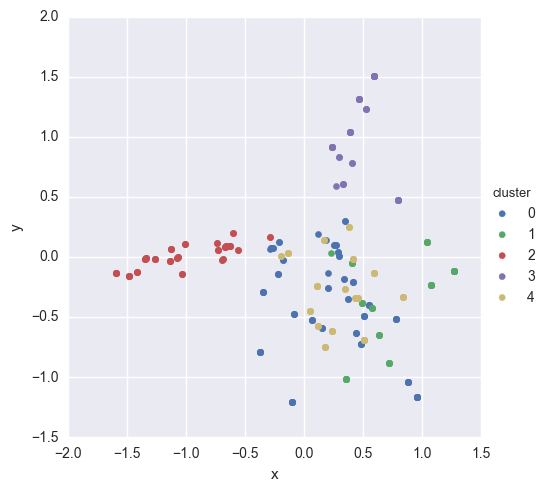

In [21]:
fig = sns.FacetGrid(df, hue='cluster', size=5).map(plt.scatter, 'x', 'y').add_legend()

Finally we use the seaborn graphing library to create a scatter plot of the cluster data. By coloring the different clusters it is easier to see the clusters. Using our 5 cluster example, clusters 2 and 3 seem to be the tightest.

### 2. Community Detection (Network) Analysis

Next we will use the clusters we developed in the previous example and create a social network graph. Of course the very first thing we will need to do is import the *networkx* library. Networkx is a package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [1]:
import networkx as nx